# Import

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [10]:
def plot_column(ax, column, df):
    if df[column].dtype == 'object':
        # Check if binary
        if df[column].nunique() == 2:
            # Binary data visualization
            df[column].value_counts().plot(kind='bar', ax=ax)
        else:
            # Categorical data visualization
            df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    elif df[column].dtype == 'int64' or df[column].dtype == 'float64':
        # Numeric data visualization
        df[column].plot(kind='hist', bins=20, ax=ax)
    else:
        ax.text(0.5, 0.5, f"Unhandled data type for column: {column}", 
                fontsize=12, ha='center')
    ax.set_title(column)


In [11]:
def plot_column_data(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return
    
    # Get the data type of the column
    data_type = df[column_name].dtype
    
    # Plot the data based on the data type
    if data_type == 'int64' or data_type == 'float64':
        # Plot numerical data
        plt.figure(figsize=(8, 6))
        plt.hist(df[column_name], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    elif data_type == 'object':
        # Plot categorical data
        value_counts = df[column_name].value_counts()
        plt.figure(figsize=(8, 6))
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar plot of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"Data type '{data_type}' not supported for plotting.")

In [12]:
def read_files_in_directory(directory):

    file_paths = []
    for root, _, files in os.walk(directory):

        for file in files:
            if file[-3:] != "txt":
                file_path = os.path.join(root, file)
                file_paths.append(file_path)
    return file_paths
directory_path = "data/geneReadTest/"
files = read_files_in_directory(directory_path)

In [1]:
HS = ["ALDOA", "ANGPTL4" , "ANLN" , "BNC1" , 'C20orf20' , 'CA9' , 
      'CDKN3' , 'COL4A6' , 'DCBLD1' , 'ENO1' , 'FAM83B', 'FOSL1' , 
      'GNAI1' , 'HIG2' , 'KCTD11' , 'KRT17' , 'LDHA' , 'MPRS17' , 
      "P4HA1" 	, 'PGAM1' 	, 'PGK1' 	, 'SDC1' 	, 'SLC16A1' , 
      'SLC2A1', 'TPI1' 	, 'VEGFA']

IS = ["HLA-DQA1", "HLA-DQA2", "HLA-DRB5", "CTLA4", "PDCD1LG2", 
      'ICAM1', 'CD274', 'STAT1', 'IRF1', 'IFNG', 'GNLY', "TBX21", 
      "CCL5", "LAG3", "CD247", 'ICOS', 'IL18RAP', "CXCL9", "CXCL10", 
      "HLA-DPB1", 'HLA-DPA1', "HLA-DMB", 'HLA-DRA', 'HLA-DMA', 'CD80', 
      "HLA-DOA", "CD4"]
hypooxia_immue_signature = HS + IS

In [2]:
len(hypooxia_immue_signature)

53

In [14]:
def extract_hypooxia_immue_signature(file):
    df = pd.read_csv(file, sep='\t',skiprows=1)
    filtered_df = df[df['gene_name'].isin(hypooxia_immue_signature)]
    gene_in_data = set(df['gene_name'])
    not_detected = set(hypooxia_immue_signature) - gene_in_data
    return filtered_df, not_detected

In [15]:
for file in files:
    df, not_detected = extract_hypooxia_immue_signature(file)
    print(not_detected)

{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}


{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}
{'MPRS17', 'HIG2', 'C20orf20'}


# Gene
| case_ID | gene_1 | gene_2 | .... | 
##### Case Id to be matched


In [16]:
def extract_tpm(file):
    df = pd.read_csv(file, sep='\t',skiprows=1)
    subset_df = df.iloc[4:, df.columns.isin(['tpm_unstranded', 'gene_id', 'gene_name'])]
    subset_df['header'] = subset_df['gene_id'] + '_' + subset_df['gene_name'] # Same genes, different id. multiple record
    transposed_df = subset_df[['header', 'tpm_unstranded']].T
    transposed_df.columns = transposed_df.loc['header']
    transposed_df = transposed_df.drop('header').reset_index(drop=True).sort_index(axis=1)
    return transposed_df

In [17]:
def merge_cases(files,extractor):
    merged = extractor(files[0])
    for file in files[1:]:
        to_be_merge = extractor(file)
        merged = pd.concat([to_be_merge, merged], axis=0, ignore_index=True)
    return merged
    

In [18]:
merge_gene_read = merge_cases(files,extract_tpm)


# Protein
| case_ID | protein_1 | protein_2 | .... |

In [19]:
# directory_path = "../data/Protein_Expression"
# files = read_files_in_directory(directory_path)

In [20]:
def get_case_id_from_filename(file):
    index = file.find("TCGA")
    return file[index:index+12]

In [21]:
def extract_protein_expression(file):
    df = pd.read_csv(file, sep='\t')
    subset_df = df[['protein_expression', 'AGID']]
    transposed_df = subset_df.set_index('AGID').T
    transposed_df = transposed_df.reset_index(drop=True)
    transposed_df.insert(0, 'case_submitter_id', [get_case_id_from_filename(file)])
    return transposed_df

In [22]:
merged_protein_expression = pd.read_csv('merged_protein_expression.csv')
merged_protein_expression.shape

(353, 488)

In [23]:
# merged_protein_expression = merge_cases(files,extract_protein_expression).sort_values(by='case_submitter_id')
# merged_protein_expression.to_csv('merged_protein_expression.csv',index=False)

In [24]:
def calculate_column_statistics(df):
    results = pd.DataFrame(index=df.columns, columns=['Mean', 'Variance', 'NumUniqueValues', 'NumNaNs'])
    for column in df.columns:
        if column not in ["case_submitter_id"]:
            results.at[column, 'Mean'] = df[column].mean()
            results.at[column, 'Variance'] = df[column].var()
            results.at[column, 'NumUniqueValues'] = df[column].nunique()
            results.at[column, 'NumNaNs'] = df[column].isna().sum()
    return results

In [25]:
pd.set_option('display.max_rows', 500)

In [26]:
statistics= calculate_column_statistics(merged_protein_expression)


In [27]:
def extract_rows_by_nan(df, nan_threshold=353):
    columns = [column for column in df.columns if df[column].isna().sum() == nan_threshold]
    return columns

In [28]:
statistics= calculate_column_statistics(merged_protein_expression)
statistics["NumNaNs"].unique()

array([nan, 0, 10, 353, 141, 280], dtype=object)

353 means the protein is missing in all cases, drop

In [29]:
empmpty_columns = extract_rows_by_nan(merged_protein_expression,353)
merged_protein_expression = merged_protein_expression.drop(columns=empmpty_columns)
merged_protein_expression.shape

(353, 470)

488-470 = 18: 18 protein is removed since they are empty

In [30]:
full_columns = extract_rows_by_nan(merged_protein_expression,0)
merged_protein_expression[full_columns].shape

(353, 218)

218/488 protein recorded in all 353 cases

In [31]:
def extract_rows_with_nan(df, columns):
    return df[df[columns].isnull().any(axis=1)]

In [32]:
columns_missing_10 = extract_rows_by_nan(merged_protein_expression,10)
merged_protein_expression[columns_missing_10].isna().any(axis=1).sum()

10

In [33]:
missing_rows=extract_rows_with_nan(merged_protein_expression,columns_missing_10)[["case_submitter_id"]+columns_missing_10]

Above 10 cases contains 240 missing values, too much missing and only 10, drop?

In [34]:
merged_protein_expression = merged_protein_expression.drop(missing_rows.index)
merged_protein_expression.shape

(343, 470)

In [35]:
calculate_column_statistics(merged_protein_expression)["NumNaNs"].unique()

array([nan, 0, 141, 270], dtype=object)

1 columns missing in 280 cases now 270

In [36]:
columns = extract_rows_by_nan(merged_protein_expression,270)
column = merged_protein_expression[columns]
calculate_column_statistics(column)

,Mean,Variance,NumUniqueValues,NumNaNs
AGID00332,0.753015,1.012533,73,270


In [37]:
merged_protein_expression = merged_protein_expression.drop(["AGID00332"],axis=1)
merged_protein_expression.shape


(343, 469)

In [38]:
calculate_column_statistics(merged_protein_expression)["NumNaNs"].unique()

array([nan, 0, 141], dtype=object)

In [39]:
columns = extract_rows_by_nan(merged_protein_expression,141)
merged_protein_expression[columns].shape


(343, 12)

12 columns 141 missing values, imputation?
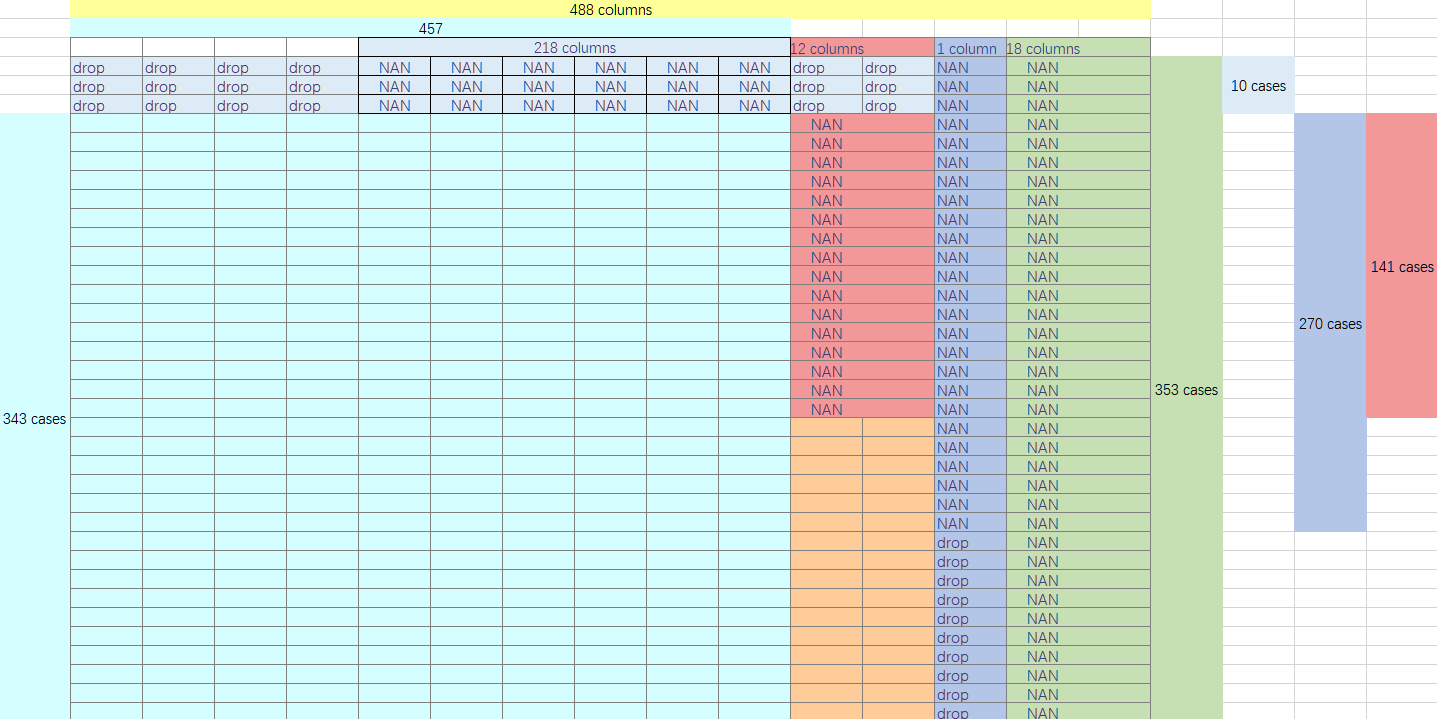

In [40]:
# medians = merged_protein_expression[columns].median()

# merged_protein_expression[columns] = merged_protein_expression[columns].fillna(medians)
# protein_expression_no_inputation = merged_protein_expression.drop(columns=columns, axis=1)
# print(merged_protein_expression.shape,protein_expression_no_inputation.shape)


In [41]:
path = "D:\\UCL\\Week14\\HSAE\\data\\clinical\\clinical.tsv"
df = pd.read_csv(path,sep='\t')

In [42]:
df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')

In [43]:
# df['days_to_last_follow_up'] = pd.to_numeric(df['days_to_last_follow_up'], errors='coerce')
# df['days_to_death'] = pd.to_numeric(df['days_to_death'], errors='coerce')
# df['days_to_diagnosis'] = pd.to_numeric(df['days_to_diagnosis'], errors='coerce')
# deceased_patients = df[df['vital_status'] == 'Dead']


In [45]:
colums = ["case_submitter_id","age_at_index", "days_to_birth", "days_to_death", "ethnicity", "gender", "race", "vital_status", "age_at_diagnosis", "days_to_last_follow_up","year_of_diagnosis", "treatment_or_therapy","ajcc_pathologic_stage"]
deduplicate = df[df.index %2 !=0].sort_values(by='case_submitter_id')

In [46]:
merged_df_no_inputation = pd.merge(merged_protein_expression, deduplicate[["ajcc_pathologic_stage","days_to_death","case_submitter_id"]], on='case_submitter_id', how='inner')
merged_df_no_inputation["ajcc_pathologic_stage"].unique()

array(['Stage IVA', "'--", 'Stage II', 'Stage III', 'Stage I',
       'Stage IVB'], dtype=object)

In [47]:
def encode_stage_column(df, column_name):
    # Define mapping dictionary
    stage_mapping = {
        "Stage I": 0,
        "Stage II": 1,
        "Stage III": 2,
        "Stage IVA": 3,
        "Stage IVB": 4,
        "'--": -1
            }
    
    # Apply mapping to the column
    df[column_name] = df[column_name].map(stage_mapping)
    
    return df

In [48]:
merged_df_no_inputation = encode_stage_column(merged_df_no_inputation,"ajcc_pathologic_stage")

If ajcc_pathologic_stage is none plus the columns are null, no information on what median to map to, drop
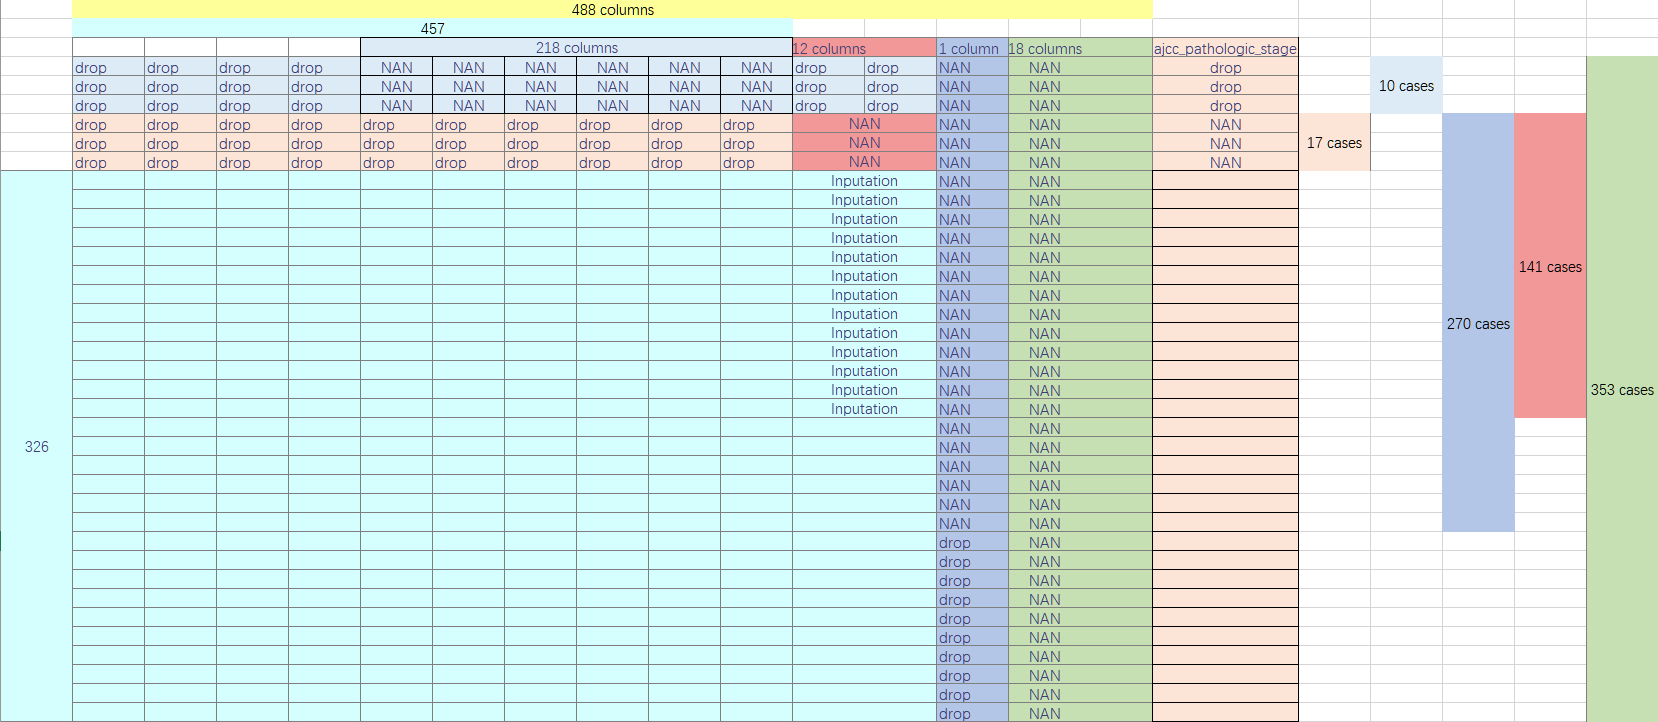

In [49]:
merged_df_no_inputation.shape

(343, 471)

In [50]:
def drop_rows(df, columns_to_check):
    all_nan = df[columns_to_check].isnull().all(axis=1)
    stage_minus_one = df["ajcc_pathologic_stage"] == -1
    to_drop = all_nan & stage_minus_one
    df = df[~to_drop]
    return df
merged_df_no_inputation = drop_rows(merged_df_no_inputation,columns)

In [51]:
merged_df_no_inputation.shape

(326, 471)

In [52]:
def impute_missing_with_group_median(merged_df_no_inputation, reference_column, columns_to_impute):

    for col in columns_to_impute:

        median_values = merged_df_no_inputation.groupby(reference_column)[col].median()

        for index, row in merged_df_no_inputation[merged_df_no_inputation[col].isnull()].iterrows():

            
            label_value = row[reference_column]

            merged_df_no_inputation.at[index, col] = median_values[label_value]
    return merged_df_no_inputation

In [53]:
merged_df = impute_missing_with_group_median(merged_df_no_inputation,"ajcc_pathologic_stage",columns)

In [54]:
def contain_nan(df,col):
    if df[col].isna().any():
        return True
    return False

In [55]:
for col in columns:
    print(contain_nan(merged_df,col))

False
False
False
False
False
False
False
False
False
False
False
False


# Load data


In [56]:
# merged_df.to_csv('protein_expression.csv',index=False)


In [158]:
merged_df = pd.read_csv('protein_expression.csv')
columns = ['AGID00215',
 'AGID00537',
 'AGID00536',
 'AGID00211',
 'AGID00485',
 'AGID00383',
 'AGID00216',
 'AGID00257',
 'AGID00545',
 'AGID00413',
 'AGID00547',
 'AGID00144']

AE

In [159]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC

In [167]:
merged_df = merged_df.drop('case_submitter_id', axis=1)
merged_df = merged_df.drop('ajcc_pathologic_stage', axis=1)
other = merged_df.columns.drop("days_to_death")
X_train, X_test, y_train, y_test = train_test_split(merged_df[other], merged_df["days_to_death"],
                                                    train_size=0.75,
                                                    random_state=1)

In [168]:
merged_df_no_inputation = merged_df.drop(columns, axis=1)
other = merged_df_no_inputation.columns.drop("days_to_death")
X_train_no_inputation, X_test_no_inputation, y_train_no_inputation, y_test_no_inputation = train_test_split(merged_df_no_inputation[other], merged_df_no_inputation["days_to_death"],
                                                    test_size=0.75,
                                                    random_state=1)

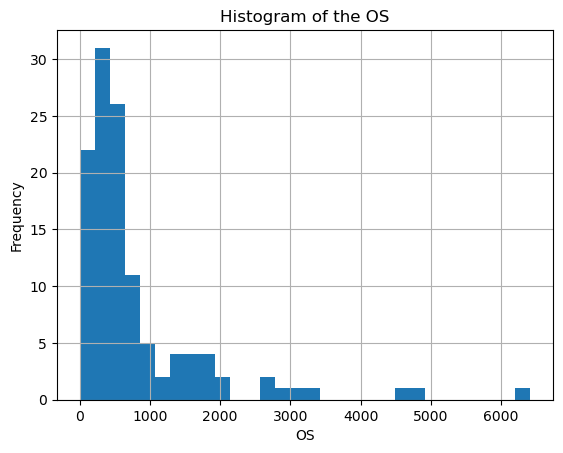

In [169]:
y_train.hist(bins=30) 
plt.xlabel('OS')
plt.ylabel('Frequency')
plt.title('Histogram of the OS')
plt.show()

survice timespan: 
1. 0-1
2. 1-3
3. 3-5
4. 5-10
5. 10-20
6. >20 /alive

## AE class

In [170]:
class AE():
    def __init__(self,X_train,X_test,y_train,y_test,bottleneck,type):
        self.X_train = X_train
        self.X_test = X_test        
        self.y_train = y_train
        self.y_test = y_test
        self.bottleneck = bottleneck
        self.history = None
        self.encoder = None
        self.autoencoder = None
        self.type = type
        self.classifer = None

    def train(self):
    # Number of features in your dataset
        n_features = len(self.X_train.columns) 


        input_layer = Input(shape=(n_features,))
        encoder = Dense(64, activation='relu')(input_layer)
        encoder = Dense(32, activation='relu')(encoder)


        bottleneck = Dense(self.bottleneck, activation='relu')(encoder)  

        # Define the decoder (mirror the encoder)
        decoder = Dense(32, activation='relu')(bottleneck)
        decoder = Dense(64, activation='relu')(decoder)
        self.encoder= Model(inputs=input_layer, outputs=bottleneck)

        # Output layer
        output_layer = Dense(n_features, activation='sigmoid')(decoder) 

        # Define the autoencoder model
        self.autoencoder = Model(inputs=input_layer, outputs=output_layer)

        # Compile the autoencoder
        self.autoencoder.compile(optimizer='adam', loss='mse')

        self.history = self.autoencoder.fit(self.X_train, self.X_train,  # The target is the input data itself
                epochs=100,
                batch_size=16,
                shuffle=True,
                validation_data=(self.X_test, self.X_test))
        
        self.encode()
        self.map_y()

    def plot(self):
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss '+ self.type)
        plt.legend()
        plt.show()

    def encode(self):
        self.encoded_X_train = self.encoder.predict(self.X_train)
        self.encoded_X_test = self.encoder.predict(self.X_test)
    
    def do_PCA(self,n_components):
        if n_components ==2:
            pca = PCA(n_components=n_components)
            reduced_data = pca.fit_transform(self.encoded_X_test)
            x = reduced_data[:, 0]
            y = reduced_data[:, 1]
            plt.figure(figsize=(8, 6))
            scatter = plt.scatter(x, y, c=self.y_test_in_bin, cmap='viridis', alpha=0.7)
            plt.title('PCA of Encoded Data '+self.type)
            plt.xlabel('Principal Component 1')
            plt.ylabel('Principal Component 2')
            plt.colorbar(scatter, label='OS')
            plt.grid(True)
            plt.show()
        elif n_components ==3:
            pca = PCA(n_components=3)  # Reduce to 3 dimensions
            reduced_data = pca.fit_transform(self.encoded_X_test)
            x = reduced_data[:, 0]
            y = reduced_data[:, 1]
            z = reduced_data[:, 2]
            fig =plt.figure(figsize=(8, 6))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(x, y, z, c=self.y_test_in_bin, cmap='viridis', depthshade=True)
            ax.set_title('3D PCA of Encoded Data '+self.type)
            ax.set_xlabel('Principal Component 1')
            ax.set_ylabel('Principal Component 2')
            ax.set_zlabel('Principal Component 3')
            plt.colorbar(scatter, label='OS')
            plt.show()

    @staticmethod
    def map_years_to_group(value):
        years = value / 365
        if years <= 1:
            return 0
        elif 1 < years <= 3:
            return 1
        elif 3 < years <= 5:
            return 2
        elif 5 < years <= 10:
            return 3
        elif 10 < years <= 20:
            return 4
        else:  
            return 5
        
    @staticmethod        
    def map_to_binary(category):
        if category >= 4:
            return 1
        else:  
            return 0
        
    def map_y(self):
        self.y_trian_in_category = self.y_train.map(AE.map_years_to_group)
        self.y_test_in_category = self.y_test.map(AE.map_years_to_group)        
        
        self.y_trian_in_bin = self.y_trian_in_category.map(AE.map_to_binary)
        self.y_test_in_bin = self.y_test_in_category.map(AE.map_to_binary)

    def do_RF(self,binary):
        clf = RandomForestClassifier(n_estimators=100, random_state=0)

        if binary:
            clf.fit(self.encoded_X_train, self.y_trian_in_bin)
            y_pred = clf.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_bin, y_pred)
            print(classification_report(self.y_test_in_bin, y_pred))

        else:
            clf.fit(self.encoded_X_train, self.y_trian_in_category)
            y_pred = clf.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_category, y_pred)
            print(classification_report(self.y_test_in_category, y_pred))

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(self.y_test_in_bin))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('RF Confusion Matrix '+self.type)
        plt.show()
        self.classifer = clf

    def do_Kmean(self):
        # Number of clusters - assuming you want as many as your known classes
        num_clusters = 2
        # Perform K-means clustering on the PCA output
        kmeans = KMeans(n_clusters=num_clusters, random_state=0)
        cluster_labels = kmeans.fit_predict(self.encoded_X_test)  # Use your 2D or 3D PCA-reduced data here


        print("Classification Report:")
        print(classification_report(self.y_test_in_bin, cluster_labels))
        conf_mat = confusion_matrix(self.y_test_in_bin, cluster_labels)

        # Plotting the confusion matrix
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_clusters), yticklabels=np.unique(self.y_test_in_bin))
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('K-mean Confusion Matrix '+self.type)
        plt.show()
        self.classifer = kmeans

    def do_SVM(self,binary):
        svm_classifier = SVC(kernel='rbf', random_state=42)

        if binary:
            svm_classifier.fit(self.encoded_X_train, self.y_trian_in_bin)
            y_pred = svm_classifier.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_bin, y_pred)
            print(classification_report(self.y_test_in_bin, y_pred))
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(self.y_test_in_bin))
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('SVM Confusion Matrix '+ self.type)
            plt.show()
        else:
            svm_classifier.fit(self.encoded_X_train, self.y_trian_in_category)
            y_pred = svm_classifier.predict(self.encoded_X_test)
            cm = confusion_matrix(self.y_test_in_category, y_pred)
            print(classification_report(self.y_test_in_category, y_pred))
        
            # Plotting the confusion matrix
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(self.y_test_in_category))
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('SVM Confusion Matrix '+ self.type)
            plt.show()
        self.classifer = svm_classifier


        


Epoch 1/100
16/16 [==============================] - 2s 39ms/step - loss: 0.5967 - val_loss: 0.4949
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3872 - val_loss: 0.3610
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3407 - val_loss: 0.3573
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3384 - val_loss: 0.3549
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3354 - val_loss: 0.3522
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3332 - val_loss: 0.3512
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3309 - val_loss: 0.3481
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3285 - val_loss: 0.3469
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3271 - val_loss: 0.3456
Epoch 10/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3262 - val_loss: 0.3450
Epoch 11

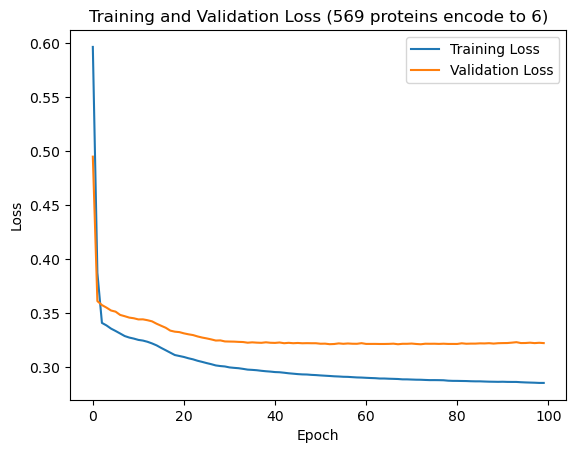

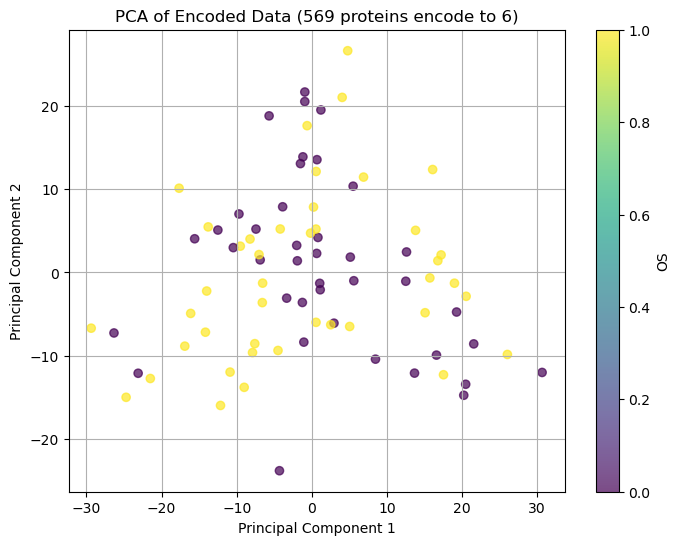

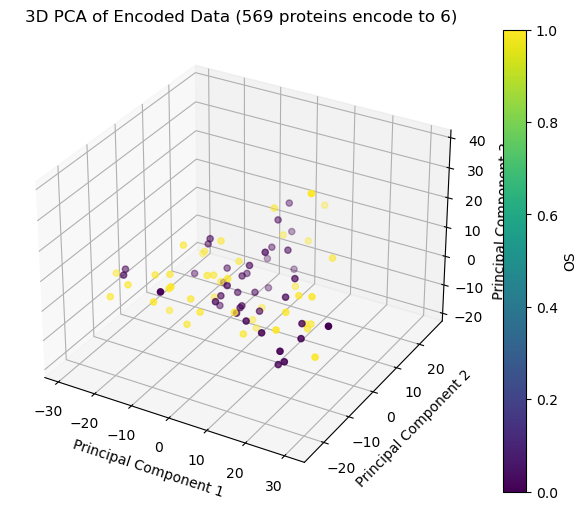

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.75      0.59        40
           1       0.52      0.26      0.35        42

    accuracy                           0.50        82
   macro avg       0.51      0.51      0.47        82
weighted avg       0.51      0.50      0.47        82



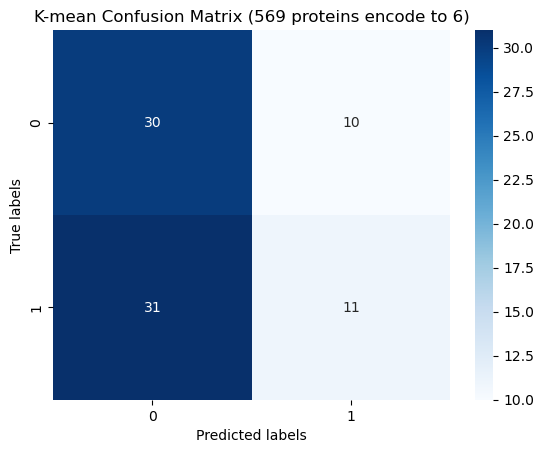

              precision    recall  f1-score   support

           0       0.52      0.60      0.56        40
           1       0.56      0.48      0.51        42

    accuracy                           0.54        82
   macro avg       0.54      0.54      0.54        82
weighted avg       0.54      0.54      0.53        82



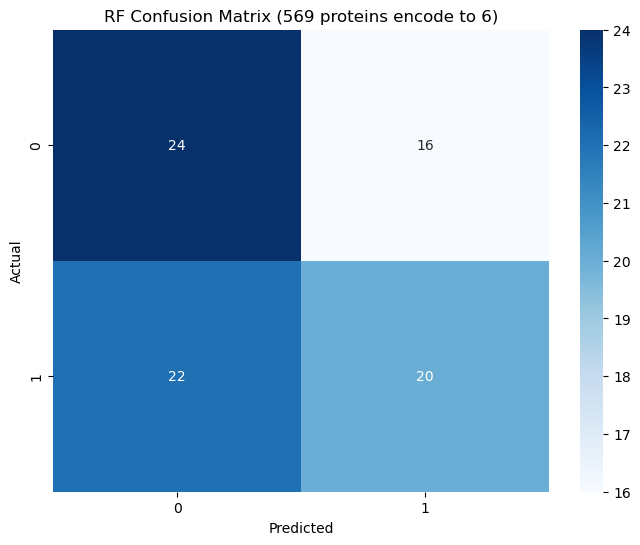

              precision    recall  f1-score   support

           0       0.49      0.47      0.48        40
           1       0.51      0.52      0.52        42

    accuracy                           0.50        82
   macro avg       0.50      0.50      0.50        82
weighted avg       0.50      0.50      0.50        82



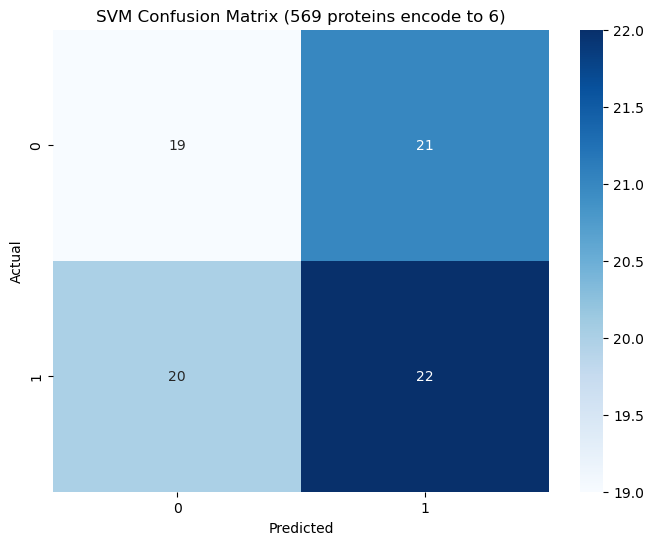

In [171]:
AE_inputation = AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 6,type = "(569 proteins encode to 6)")
AE_inputation.train()
AE_inputation.plot()
AE_inputation.do_PCA(2)
AE_inputation.do_PCA(3)
AE_inputation.do_Kmean()
AE_inputation.do_RF(binary=True)
AE_inputation.do_SVM(binary=True)



In [165]:
# loaded_model = tf.keras.models.load_model("path/to/save/model.h5")
AE_inputation.autoencoder.save("model/AE_inputation_autoencoder.h5")
AE_inputation.encoder.save("model/AE_inputation_encoder.h5")


C:\Users\JCH\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Not Ideal, switch to binary classification
1. AE to 6
2. AE to 2 dim

Epoch 1/100
6/6 [==============================] - 2s 131ms/step - loss: 0.6215 - val_loss: 0.6522
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 0.5977 - val_loss: 0.6066
Epoch 3/100
6/6 [==============================] - 0s 26ms/step - loss: 0.5350 - val_loss: 0.5112
Epoch 4/100
6/6 [==============================] - 0s 21ms/step - loss: 0.4294 - val_loss: 0.4114
Epoch 5/100
6/6 [==============================] - 0s 43ms/step - loss: 0.3466 - val_loss: 0.3700
Epoch 6/100
6/6 [==============================] - 0s 26ms/step - loss: 0.3204 - val_loss: 0.3629
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 0.3167 - val_loss: 0.3610
Epoch 8/100
6/6 [==============================] - 0s 19ms/step - loss: 0.3151 - val_loss: 0.3597
Epoch 9/100
6/6 [==============================] - 0s 20ms/step - loss: 0.3140 - val_loss: 0.3587
Epoch 10/100
6/6 [==============================] - 0s 19ms/step - loss: 0.3132 - val_loss: 0.3588
Epoch 11/100
6/6 [

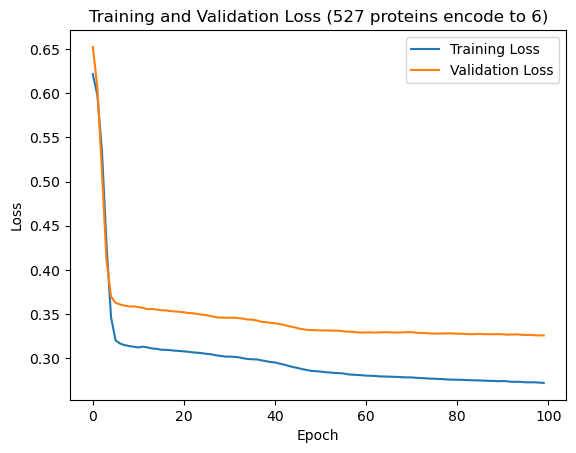

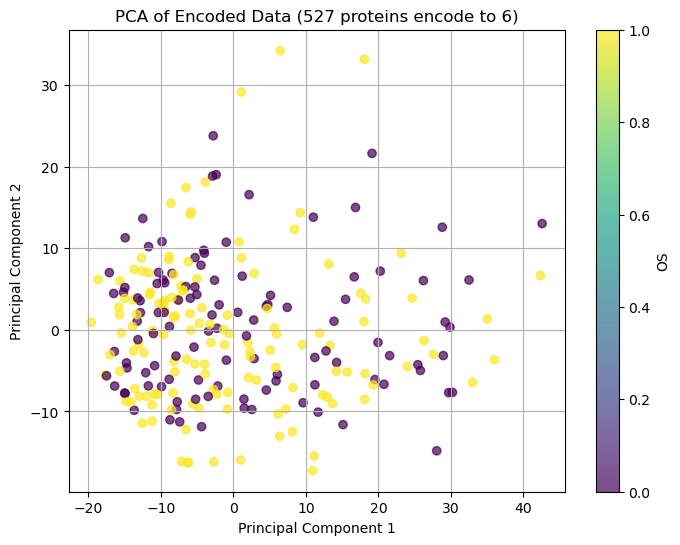

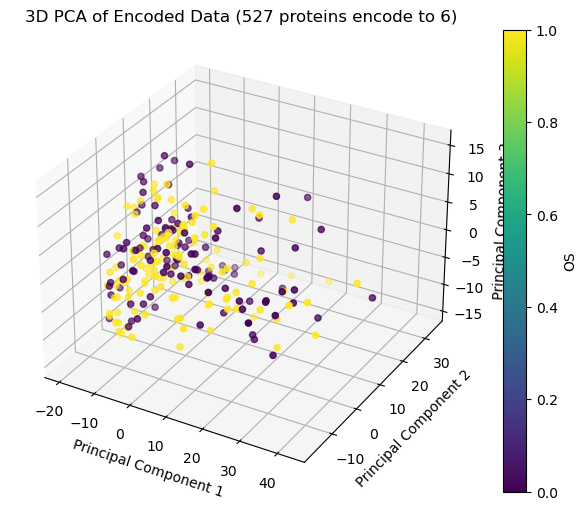

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.70      0.55       111
           1       0.54      0.28      0.37       134

    accuracy                           0.47       245
   macro avg       0.49      0.49      0.46       245
weighted avg       0.50      0.47      0.45       245



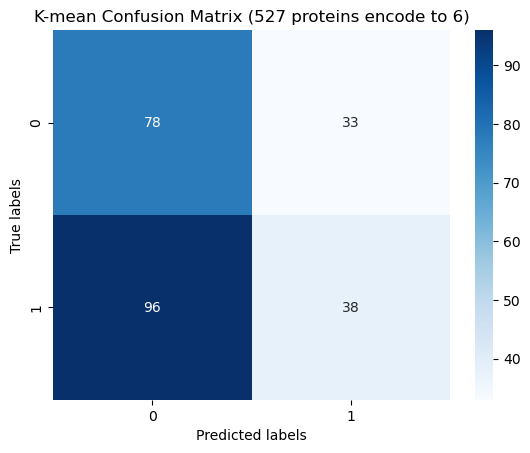

              precision    recall  f1-score   support

           0       0.46      0.69      0.56       111
           1       0.57      0.34      0.42       134

    accuracy                           0.50       245
   macro avg       0.52      0.51      0.49       245
weighted avg       0.52      0.50      0.48       245



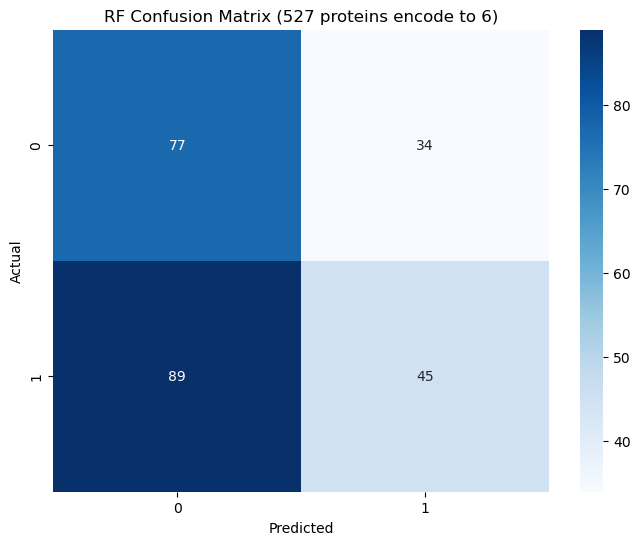

              precision    recall  f1-score   support

           0       0.47      0.68      0.56       111
           1       0.59      0.38      0.46       134

    accuracy                           0.51       245
   macro avg       0.53      0.53      0.51       245
weighted avg       0.54      0.51      0.51       245



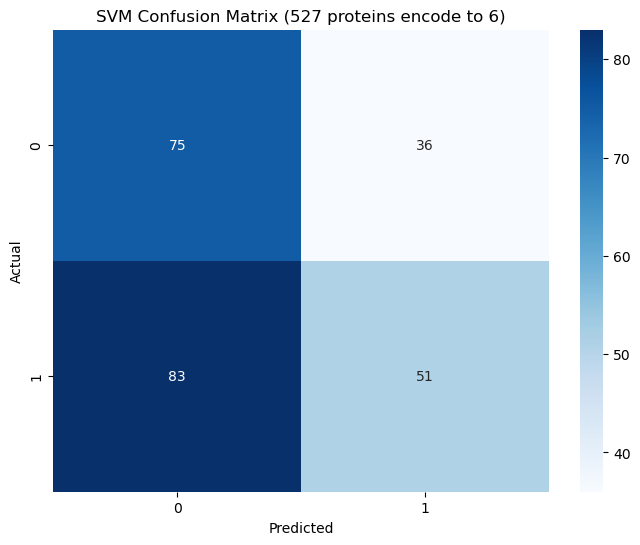

In [172]:
AE_no_inputation = AE(X_train=X_train_no_inputation,X_test=X_test_no_inputation,y_train=y_train_no_inputation,y_test=y_test_no_inputation,bottleneck = 6,type = "(527 proteins encode to 6)")
AE_no_inputation.train()
AE_no_inputation.plot()
AE_no_inputation.do_PCA(2)
AE_no_inputation.do_PCA(3)
AE_no_inputation.do_Kmean()
AE_no_inputation.do_RF(binary=True)
AE_no_inputation.do_SVM(binary=True)



In [91]:
AE_no_inputation.autoencoder.save("model/AE_no_inputation_autoencoder.h5")
AE_no_inputation.encoder.save("model/AE_no_inputation_encoder.h5")

Epoch 1/100
16/16 [==============================] - 1s 28ms/step - loss: 0.6151 - val_loss: 0.5450
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4104 - val_loss: 0.3635
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3417 - val_loss: 0.3580
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3399 - val_loss: 0.3562
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3378 - val_loss: 0.3559
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3366 - val_loss: 0.3546
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3355 - val_loss: 0.3530
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3340 - val_loss: 0.3514
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3313 - val_loss: 0.3488
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3283 - val_loss: 0.3466
Epoch 11

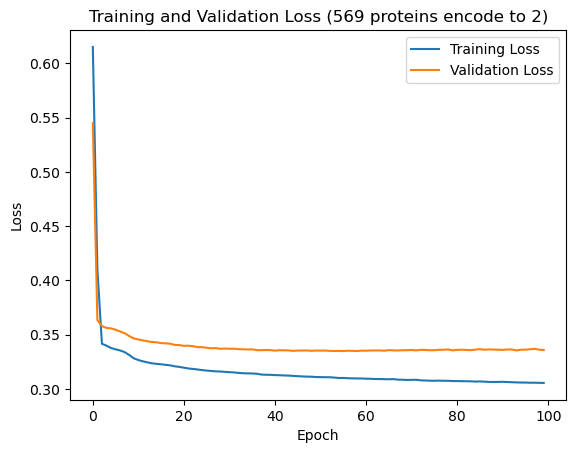

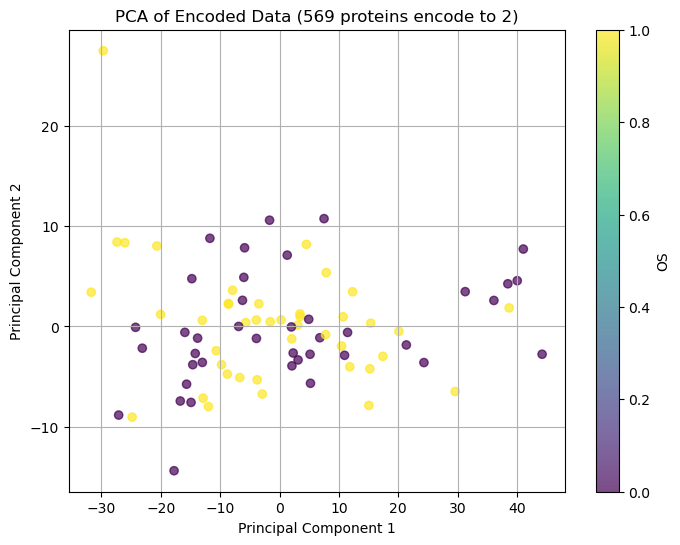

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.30      0.37        40
           1       0.51      0.69      0.59        42

    accuracy                           0.50        82
   macro avg       0.49      0.50      0.48        82
weighted avg       0.49      0.50      0.48        82



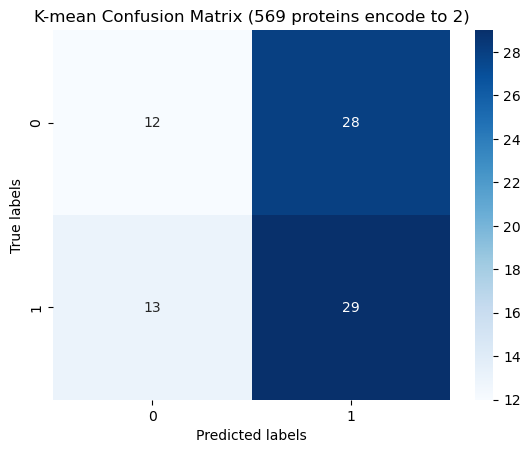

              precision    recall  f1-score   support

           0       0.47      0.55      0.51        40
           1       0.49      0.40      0.44        42

    accuracy                           0.48        82
   macro avg       0.48      0.48      0.47        82
weighted avg       0.48      0.48      0.47        82



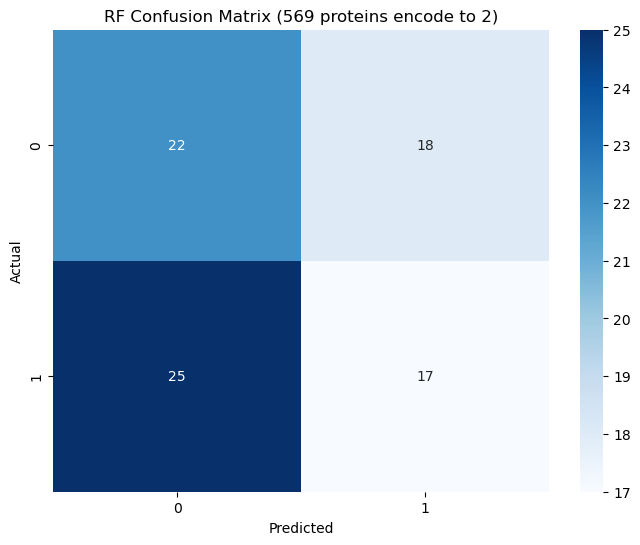

              precision    recall  f1-score   support

           0       0.52      0.38      0.43        40
           1       0.53      0.67      0.59        42

    accuracy                           0.52        82
   macro avg       0.52      0.52      0.51        82
weighted avg       0.52      0.52      0.51        82



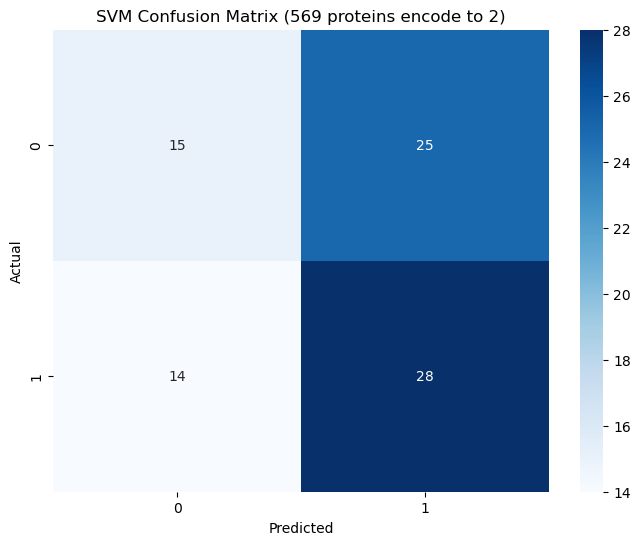

In [22]:
AE_inputation_2d = AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 2,type = "(569 proteins encode to 2)")
AE_inputation_2d.train()
AE_inputation_2d.plot()
AE_inputation_2d.do_PCA(2)
AE_inputation_2d.do_Kmean()
AE_inputation_2d.do_RF(binary=True)
AE_inputation_2d.do_SVM(binary=True)



In [88]:
AE_inputation_2d.autoencoder.save("model/AE_inputation_2d_autoencoder.h5")
AE_inputation_2d.encoder.save("model/AE_inputation_2d_encoder.h5")

Epoch 1/100
6/6 [==============================] - 2s 81ms/step - loss: 0.6200 - val_loss: 0.6446
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 0.5865 - val_loss: 0.5862
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 0.5139 - val_loss: 0.4923
Epoch 4/100
6/6 [==============================] - 0s 17ms/step - loss: 0.4156 - val_loss: 0.4099
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3487 - val_loss: 0.3723
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3233 - val_loss: 0.3619
Epoch 7/100
6/6 [==============================] - 0s 31ms/step - loss: 0.3166 - val_loss: 0.3594
Epoch 8/100
6/6 [==============================] - 0s 18ms/step - loss: 0.3143 - val_loss: 0.3586
Epoch 9/100
6/6 [==============================] - 0s 13ms/step - loss: 0.3135 - val_loss: 0.3581
Epoch 10/100
6/6 [==============================] - 0s 16ms/step - loss: 0.3127 - val_loss: 0.3570
Epoch 11/100
6/6 [=

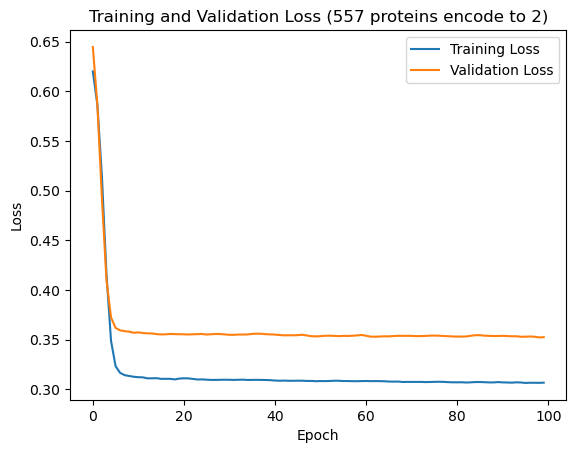

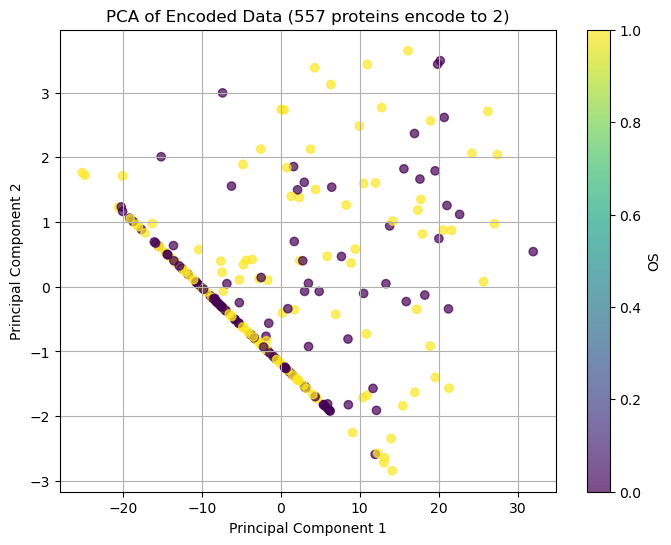

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.70      0.56       111
           1       0.58      0.34      0.42       134

    accuracy                           0.50       245
   macro avg       0.52      0.52      0.49       245
weighted avg       0.53      0.50      0.49       245



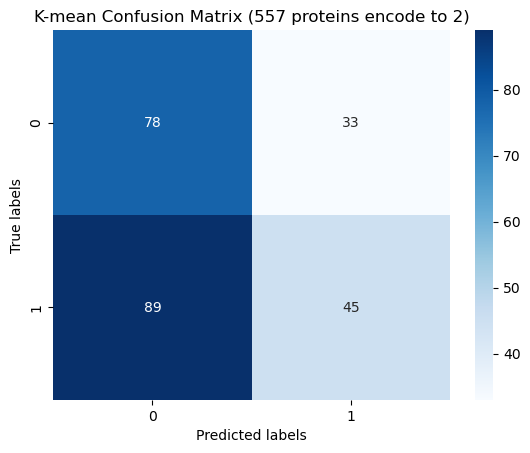

              precision    recall  f1-score   support

           0       0.50      0.66      0.57       111
           1       0.62      0.46      0.53       134

    accuracy                           0.55       245
   macro avg       0.56      0.56      0.55       245
weighted avg       0.57      0.55      0.55       245



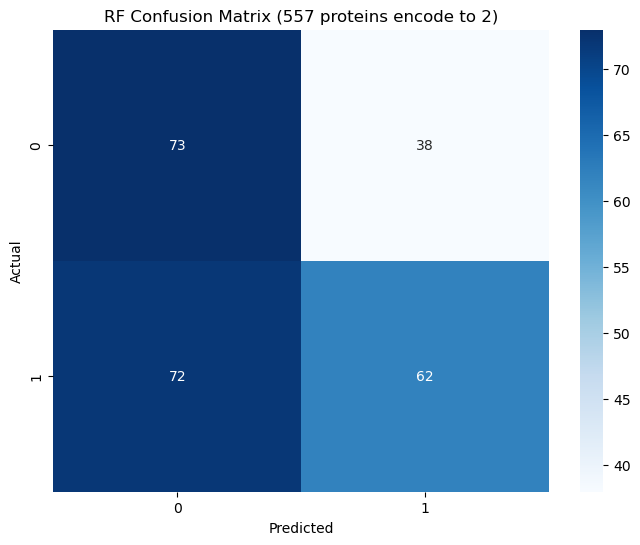

              precision    recall  f1-score   support

           0       0.46      0.84      0.59       111
           1       0.58      0.19      0.28       134

    accuracy                           0.48       245
   macro avg       0.52      0.51      0.44       245
weighted avg       0.53      0.48      0.42       245



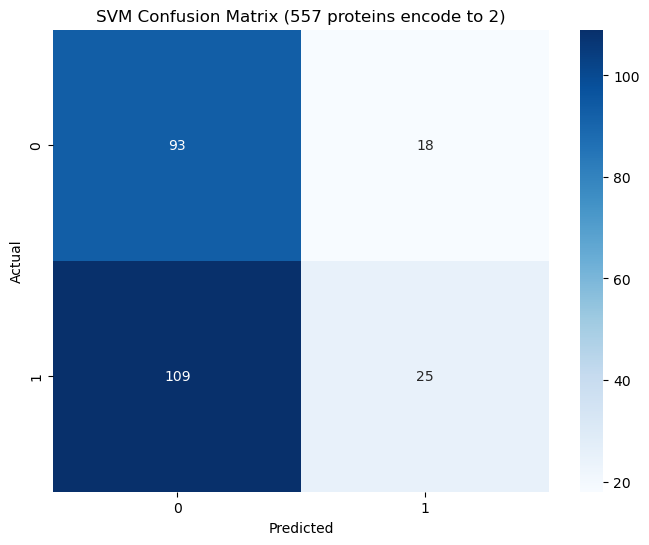

In [23]:
AE_no_inputation_2d = AE(X_train=X_train_no_inputation,X_test=X_test_no_inputation,y_train=y_train_no_inputation,y_test=y_test_no_inputation,bottleneck = 2,type = "(557 proteins encode to 2)")
AE_no_inputation_2d.train()
AE_no_inputation_2d.plot()
AE_no_inputation_2d.do_PCA(2)
AE_no_inputation_2d.do_Kmean()
AE_no_inputation_2d.do_RF(binary=True)
AE_no_inputation_2d.do_SVM(binary=True)



Epoch 1/100
16/16 [==============================] - 2s 31ms/step - loss: 0.6118 - val_loss: 0.5364
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4079 - val_loss: 0.3633
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3413 - val_loss: 0.3570
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3379 - val_loss: 0.3557
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3352 - val_loss: 0.3515
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3312 - val_loss: 0.3479
Epoch 7/100
16/16 [==============================] - 0s 12ms/step - loss: 0.3278 - val_loss: 0.3449
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3237 - val_loss: 0.3408
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3205 - val_loss: 0.3387
Epoch 10/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3183 - val_loss: 0.3367
Epoch 1

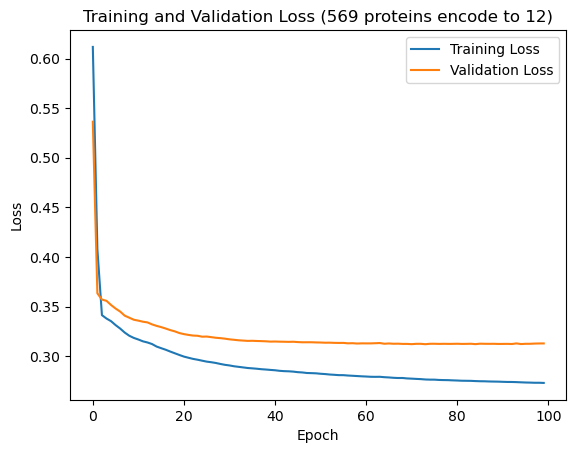

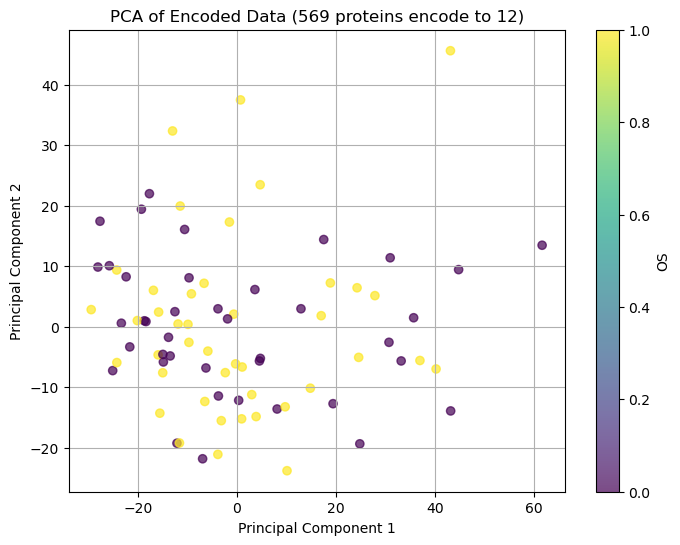

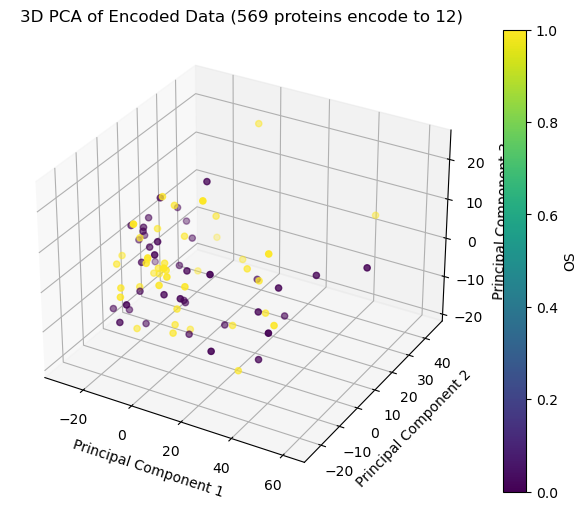

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.28      0.37        40
           1       0.53      0.79      0.63        42

    accuracy                           0.54        82
   macro avg       0.54      0.53      0.50        82
weighted avg       0.54      0.54      0.50        82



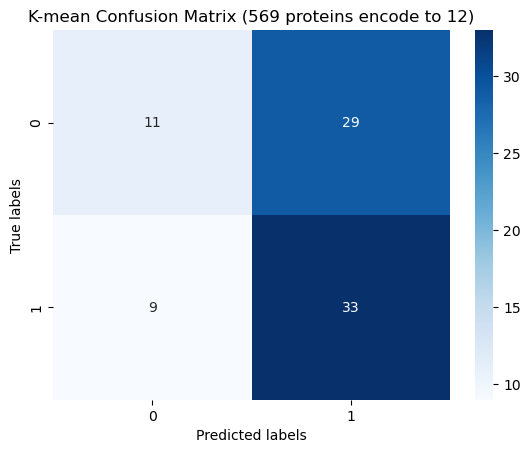

              precision    recall  f1-score   support

           0       0.50      0.42      0.46        40
           1       0.52      0.60      0.56        42

    accuracy                           0.51        82
   macro avg       0.51      0.51      0.51        82
weighted avg       0.51      0.51      0.51        82



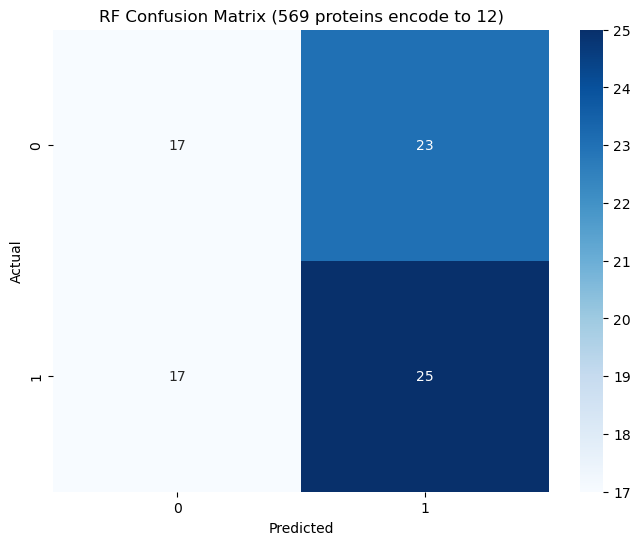

              precision    recall  f1-score   support

           0       0.54      0.38      0.44        40
           1       0.54      0.69      0.60        42

    accuracy                           0.54        82
   macro avg       0.54      0.53      0.52        82
weighted avg       0.54      0.54      0.52        82



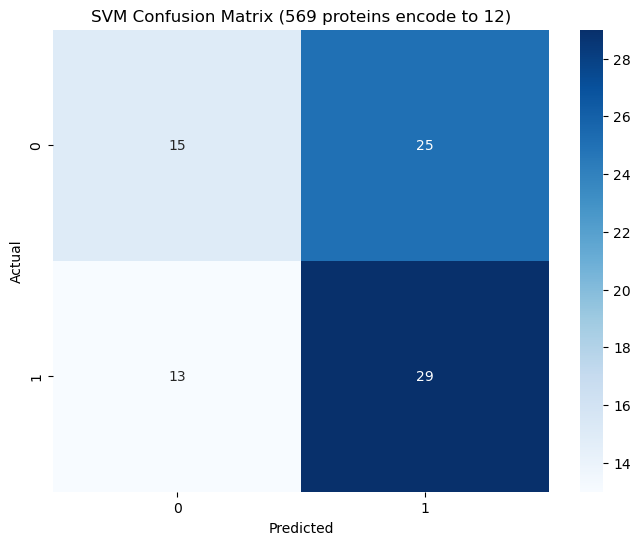

In [24]:
AE_inputation_12d = AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 12,type = "(569 proteins encode to 12)")
AE_inputation_12d.train()
AE_inputation_12d.plot()
AE_inputation_12d.do_PCA(2)
AE_inputation_12d.do_PCA(3)
AE_inputation_12d.do_Kmean()
AE_inputation_12d.do_RF(binary=True)
AE_inputation_12d.do_SVM(binary=True)



## Baseline: Exam on RAW

              precision    recall  f1-score   support

           0       0.63      0.47      0.54        40
           1       0.60      0.74      0.66        42

    accuracy                           0.61        82
   macro avg       0.61      0.61      0.60        82
weighted avg       0.61      0.61      0.60        82



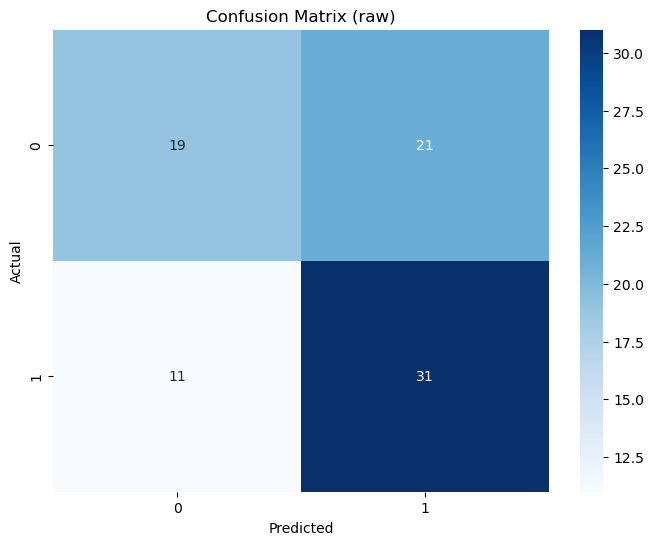

In [25]:
SVM_y_train = AE_inputation.y_trian_in_bin
SVM_y_test = AE_inputation.y_test_in_bin
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, SVM_y_train)

# Predict the labels of the test set
y_pred = svm_classifier.predict(X_test)

cm = confusion_matrix(SVM_y_test, y_pred)
print(classification_report(SVM_y_test, y_pred))
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(SVM_y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (raw)')
plt.show()


              precision    recall  f1-score   support

           0       0.62      0.53      0.57        40
           1       0.60      0.69      0.64        42

    accuracy                           0.61        82
   macro avg       0.61      0.61      0.61        82
weighted avg       0.61      0.61      0.61        82



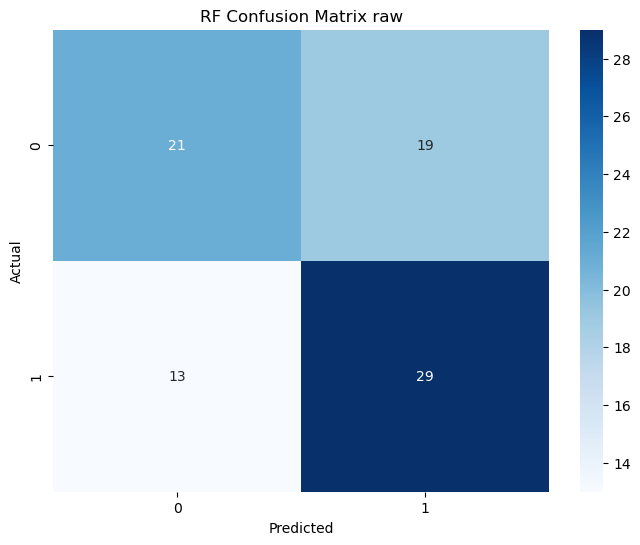

In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, SVM_y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(SVM_y_test, y_pred)
print(classification_report(SVM_y_test, y_pred))



plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(SVM_y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix raw')
plt.show()

## Wider AE

In [173]:
class Wider_AE(AE):
    def train(self):
    # Number of features in your dataset
        n_features = len(self.X_train.columns) 


        input_layer = Input(shape=(n_features,))
        encoder = Dense(256, activation='relu')(input_layer)

        encoder = Dense(128, activation='relu')(input_layer)
        encoder = Dense(64, activation='relu')(encoder)


        bottleneck = Dense(self.bottleneck, activation='relu')(encoder)  

        # Define the decoder (mirror the encoder)
        decoder = Dense(64, activation='relu')(bottleneck)
        decoder = Dense(128, activation='relu')(decoder)
        decoder = Dense(256, activation='relu')(decoder)

        self.encoder= Model(inputs=input_layer, outputs=bottleneck)

        # Output layer
        output_layer = Dense(n_features, activation='sigmoid')(decoder) 

        # Define the autoencoder model
        self.autoencoder = Model(inputs=input_layer, outputs=output_layer)

        # Compile the autoencoder
        self.autoencoder.compile(optimizer='adam', loss='mse')

        self.history = self.autoencoder.fit(self.X_train, self.X_train,  # The target is the input data itself
                epochs=100,
                batch_size=16,
                shuffle=True,
                validation_data=(self.X_test, self.X_test))
        
        self.encode()
        self.map_y()



        


Epoch 1/100
16/16 [==============================] - 3s 45ms/step - loss: 0.5385 - val_loss: 0.3669
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3456 - val_loss: 0.3627
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3437 - val_loss: 0.3597
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3390 - val_loss: 0.3535
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3343 - val_loss: 0.3496
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3291 - val_loss: 0.3447
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3249 - val_loss: 0.3429
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3225 - val_loss: 0.3402
Epoch 9/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3187 - val_loss: 0.3384
Epoch 10/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3154 - val_loss: 0.3341
Epoch 11

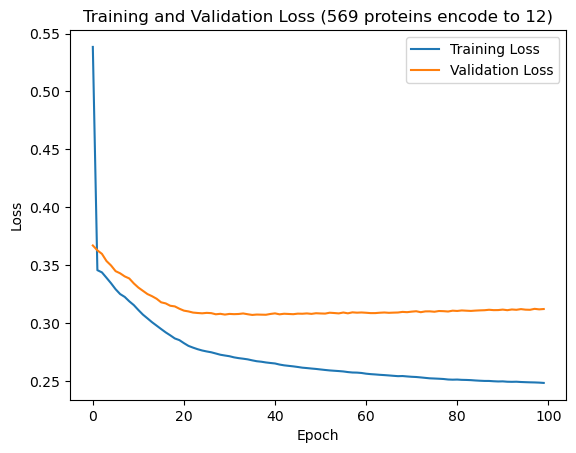

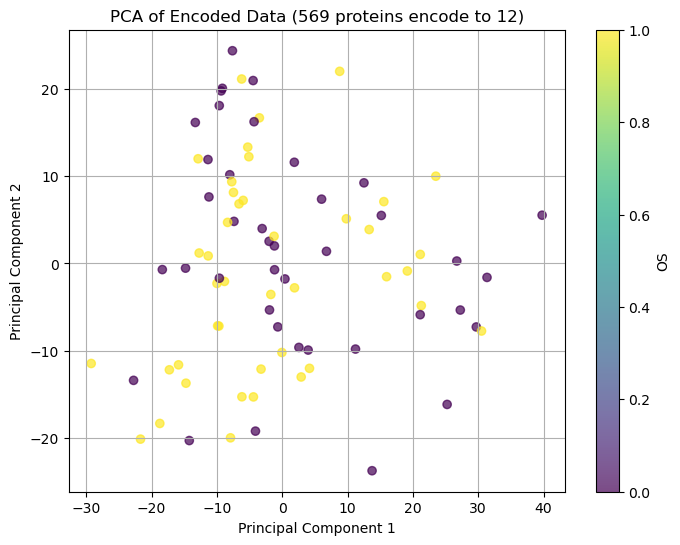

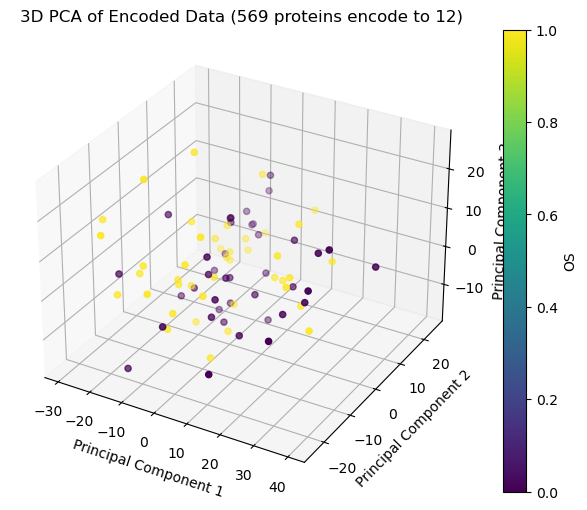

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.72      0.57        40
           1       0.48      0.24      0.32        42

    accuracy                           0.48        82
   macro avg       0.48      0.48      0.45        82
weighted avg       0.48      0.48      0.44        82



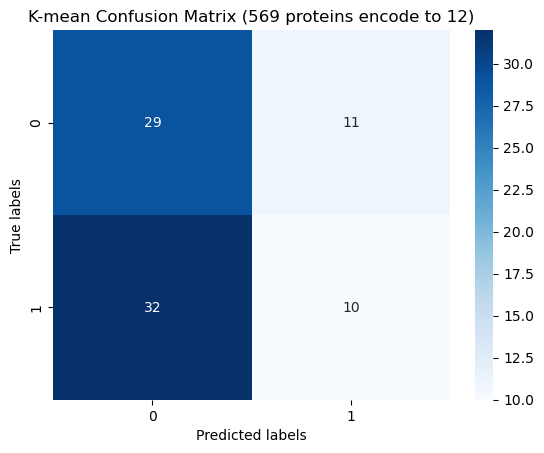

              precision    recall  f1-score   support

           0       0.69      0.50      0.58        40
           1       0.62      0.79      0.69        42

    accuracy                           0.65        82
   macro avg       0.66      0.64      0.64        82
weighted avg       0.66      0.65      0.64        82



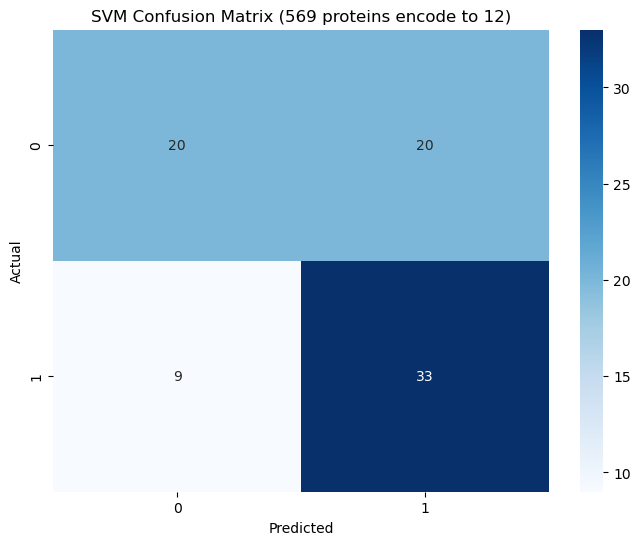

              precision    recall  f1-score   support

           0       0.60      0.53      0.56        40
           1       0.60      0.67      0.63        42

    accuracy                           0.60        82
   macro avg       0.60      0.60      0.59        82
weighted avg       0.60      0.60      0.60        82



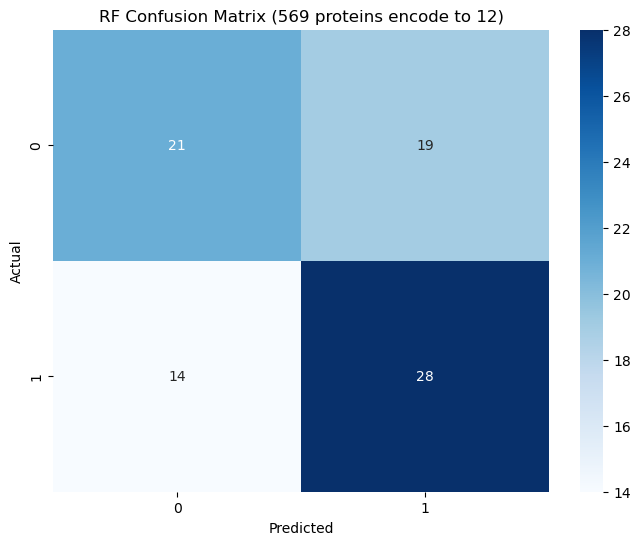

In [175]:
WAE_inputation_12d = Wider_AE(X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test,bottleneck = 24,type = "(569 proteins encode to 12)")
WAE_inputation_12d.train()
WAE_inputation_12d.plot()
WAE_inputation_12d.do_PCA(2)
WAE_inputation_12d.do_PCA(3)
WAE_inputation_12d.do_Kmean()
WAE_inputation_12d.do_SVM(binary=True)
WAE_inputation_12d.do_RF(binary=True)


In [124]:
WAE_inputation_12d.autoencoder.save("model/WAE_inputation_12d_autoencoder.h5")
WAE_inputation_12d.encoder.save("model/WAE_inputation_12d_encoder.h5")

C:\Users\JCH\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Test paper result

In [81]:
pd.set_option('display.max_columns', None)

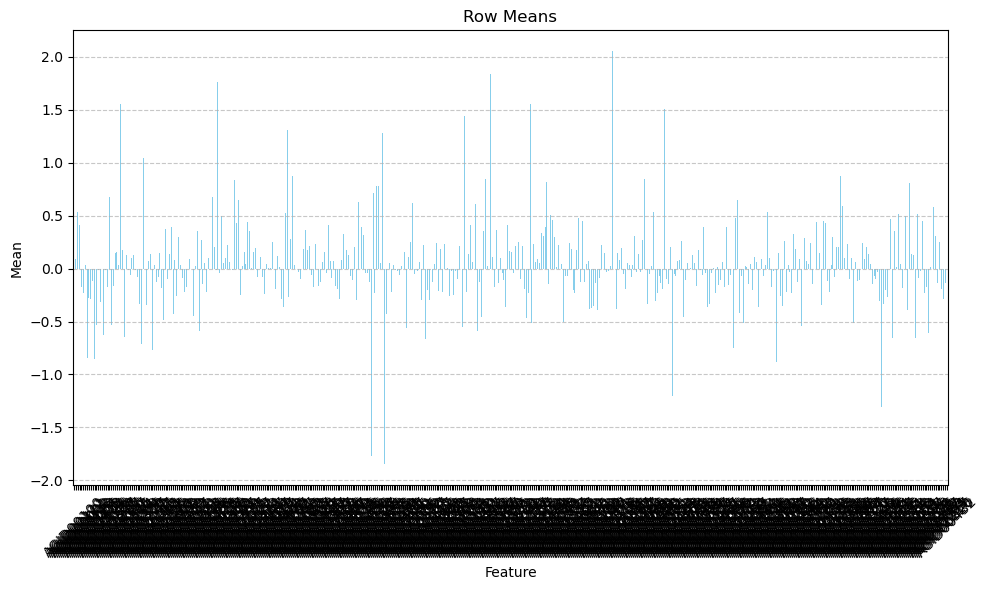

In [75]:
describe_df = X_train.describe()
row_means = describe_df.loc['mean']

# Plot row means
plt.figure(figsize=(10, 6))
row_means.plot(kind='bar', color='skyblue')
plt.title('Row Means')
plt.xlabel('Feature')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Try signature:BAK	LKB1	PAXILLIN	PEA15	SMAD4	XRCC1	CYCLINE2	PEA15_pS116	PRDX1	BRAF_pS445	IRF1
"AGID00009","AGID00529","AGID00054","AGID00124","AGID02160","AGID02137","AGID00449"，“AGID00125”，“AGID00492”，“AGID00014”，“AGID00223”
https://www.sciencedirect.com/science/article/pii/S0009898120302862

In [79]:
ps = ["AGID00009","AGID00529","AGID00054","AGID00124","AGID02160","AGID02137","AGID00449","AGID00125","AGID00492","AGID00014","AGID00223"]
key_protein = merged_df[ps]
os = merged_df["days_to_death"]
os = os.map(map_years_to_group).map(map_to_binary)

other = merged_df.columns.drop("days_to_death")
X_train, X_test, y_train, y_test = train_test_split(key_protein, os,
                                                    train_size=0.75,
                                                    random_state=1)

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        40
           1       0.55      0.55      0.55        42

    accuracy                           0.54        82
   macro avg       0.54      0.54      0.54        82
weighted avg       0.54      0.54      0.54        82



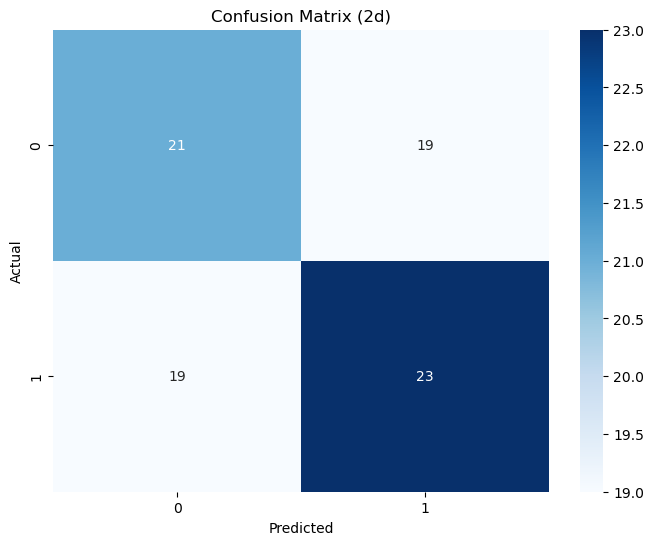

In [80]:
SVM_X_train = X_train
SVM_X_test = X_test

SVM_y_train = y_train
SVM_y_test = y_test
# Initialize SVM classifier
svm_classifier = SVC(kernel='sigmoid', random_state=42)

# Train the classifier
svm_classifier.fit(SVM_X_train, SVM_y_train)

# Predict the labels of the test set
y_pred = svm_classifier.predict(SVM_X_test)

cm = confusion_matrix(SVM_y_test, y_pred)
print(classification_report(SVM_y_test, y_pred))
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(SVM_y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (2d)')
plt.show()


# Kaplan-Meier curve and log rank test

In [176]:
path = "D:\\UCL\\Week14\\HSAE\\data\\clinical\\clinical.tsv"
df_vital_status = pd.read_csv(path,sep='\t')
df_vital_status = df_vital_status[df_vital_status.index %2 !=0].sort_values(by='case_submitter_id')

df_vital_status['days_to_last_follow_up'] = pd.to_numeric(df_vital_status['days_to_last_follow_up'], errors='coerce')
df_vital_status['days_to_death'] = pd.to_numeric(df_vital_status['days_to_death'], errors='coerce')

# df_vital_status = df_vital_status[df_vital_status['vital_status'] == 'Alive']

colums = ["case_submitter_id",  "vital_status","days_to_last_follow_up"]


In [177]:
# Drop rows where 'vital_status' is 'Dead' and 'days_to_death' is NaN

df_vital_status = df_vital_status.drop(df_vital_status[(df_vital_status['vital_status'] == 'Alive') & (df_vital_status['days_to_last_follow_up'].isna())].index)
df_vital_status = df_vital_status.drop(df_vital_status[(df_vital_status['vital_status'] == 'Dead') & (df_vital_status['days_to_death'].isna())].index)


In [178]:
def process_patient_data(df):
    # Initialize new columns
    df['lifetime'] = 0
    df['event_observed'] = 0
    
    # Iterate through each row in the DataFrame to update 'lifetime' and 'event_observed'
    for index, row in df.iterrows():
        if row['vital_status'] == 'Alive':
            df.at[index, 'lifetime'] = row['days_to_last_follow_up']
            df.at[index, 'event_observed'] = 0
        elif row['vital_status'] == 'Dead':
            df.at[index, 'lifetime'] = row['days_to_death']
            df.at[index, 'event_observed'] = 1
    
    return df
df_vital_status = process_patient_data(df_vital_status)


In [179]:
merged_df = pd.read_csv('protein_expression.csv')

In [180]:
merged_df = pd.merge(merged_df, df_vital_status[["lifetime","event_observed","case_submitter_id"]], on='case_submitter_id', how='inner')

In [183]:

other = merged_df.columns.drop("days_to_death")
X_train_KM, X_test_KM, y_train_KM, y_test_KM = train_test_split(merged_df[other], merged_df["days_to_death"],
                                                    train_size=0.75,
                                                    random_state=1)

In [185]:
gene_columns = X_test_KM.columns.drop(["lifetime","ajcc_pathologic_stage","event_observed","case_submitter_id"])


encoded_X_test_KM = WAE_inputation_12d.encoder.predict(X_test_KM[gene_columns])
encoded_X_train_KM = WAE_inputation_12d.encoder.predict(X_train_KM[gene_columns])

y_test_KM_bin = y_test_KM.map(AE.map_years_to_group).map(AE.map_to_binary)
y_train_KM_bin = y_train_KM.map(AE.map_years_to_group).map(AE.map_to_binary)

8/8 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.73      0.60      0.66        40
           1       0.67      0.78      0.72        41

    accuracy                           0.69        81
   macro avg       0.70      0.69      0.69        81
weighted avg       0.70      0.69      0.69        81



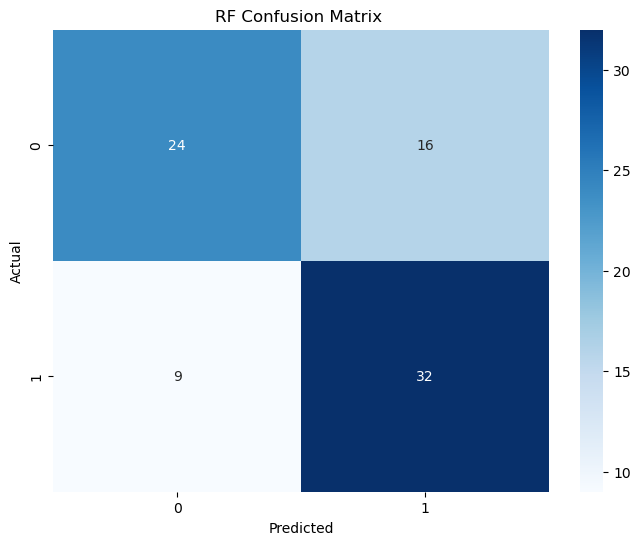

In [186]:
clf = WAE_inputation_12d.classifer

y_pred = clf.predict(encoded_X_test_KM)
cm = confusion_matrix(y_test_KM_bin, y_pred)
print(classification_report(y_test_KM_bin, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_pred), yticklabels=np.unique(y_test_KM_bin))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix ')
plt.show()


In [188]:
X_test_KM["risk_group"] = y_pred

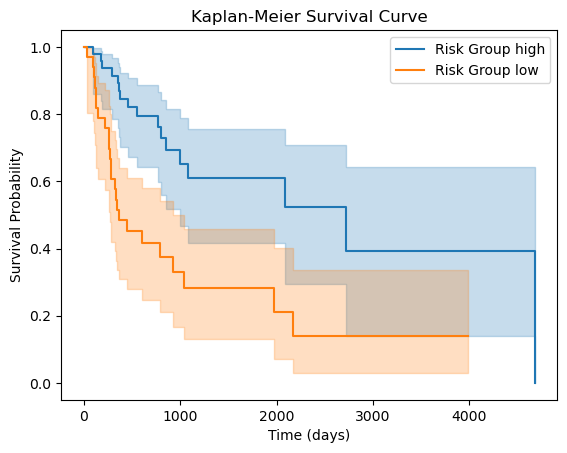

In [196]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
for group in X_test_KM['risk_group'].unique():
    # Selecting data for the group
    risk = ["low", "high"][group]
    group_data = X_test_KM[X_test_KM['risk_group'] == group]
    
    # Fitting the model
    kmf.fit(durations=group_data['lifetime'], event_observed=group_data['event_observed'], label=f'Risk Group {risk}')
    
    # Plotting the survival function
    kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curve')
    plt.xlabel('Time (days)')
    plt.ylabel('Survival Probability')

plt.legend()
plt.show()

In [197]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Split the data into two groups
group_A = X_test_KM[X_test_KM['risk_group'] == 0]
group_B = X_test_KM[X_test_KM['risk_group'] == 1]

# Perform the Log Rank Test
results = logrank_test(group_A['lifetime'], group_B['lifetime'], 
                       event_observed_A=group_A['event_observed'], 
                       event_observed_B=group_B['event_observed'])

# Print the results
print('Test statistic (chi-squared):', results.test_statistic)
print('p-value:', results.p_value)

# Interpretation
if results.p_value < 0.05:
    print("There is a statistically significant difference between the two survival curves.")
else:
    print("There is no statistically significant difference between the two survival curves.")


Test statistic (chi-squared): 12.767832547450576
p-value: 0.0003526312010219379
There is a statistically significant difference between the two survival curves.


1. normalized by dividing the expression values by the sum of expression values of the analyzed genes for each sample
2. log2 transformed
3. z-scores were calculated
4. using Spearman distance and Ward criterion Cluster analyses
5. plot heatmaps using the z-score values matrix for color intensities.
6. Cox regression analyses using Kaplan–Meier curves to compare the three highest hierarchical sample groups on each heatmap
7. Cox regression multivariate was used to calculate the combined effect of HPV status and heatmap groups (Survival package in R)


https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/Expression_mRNA_Pipeline/
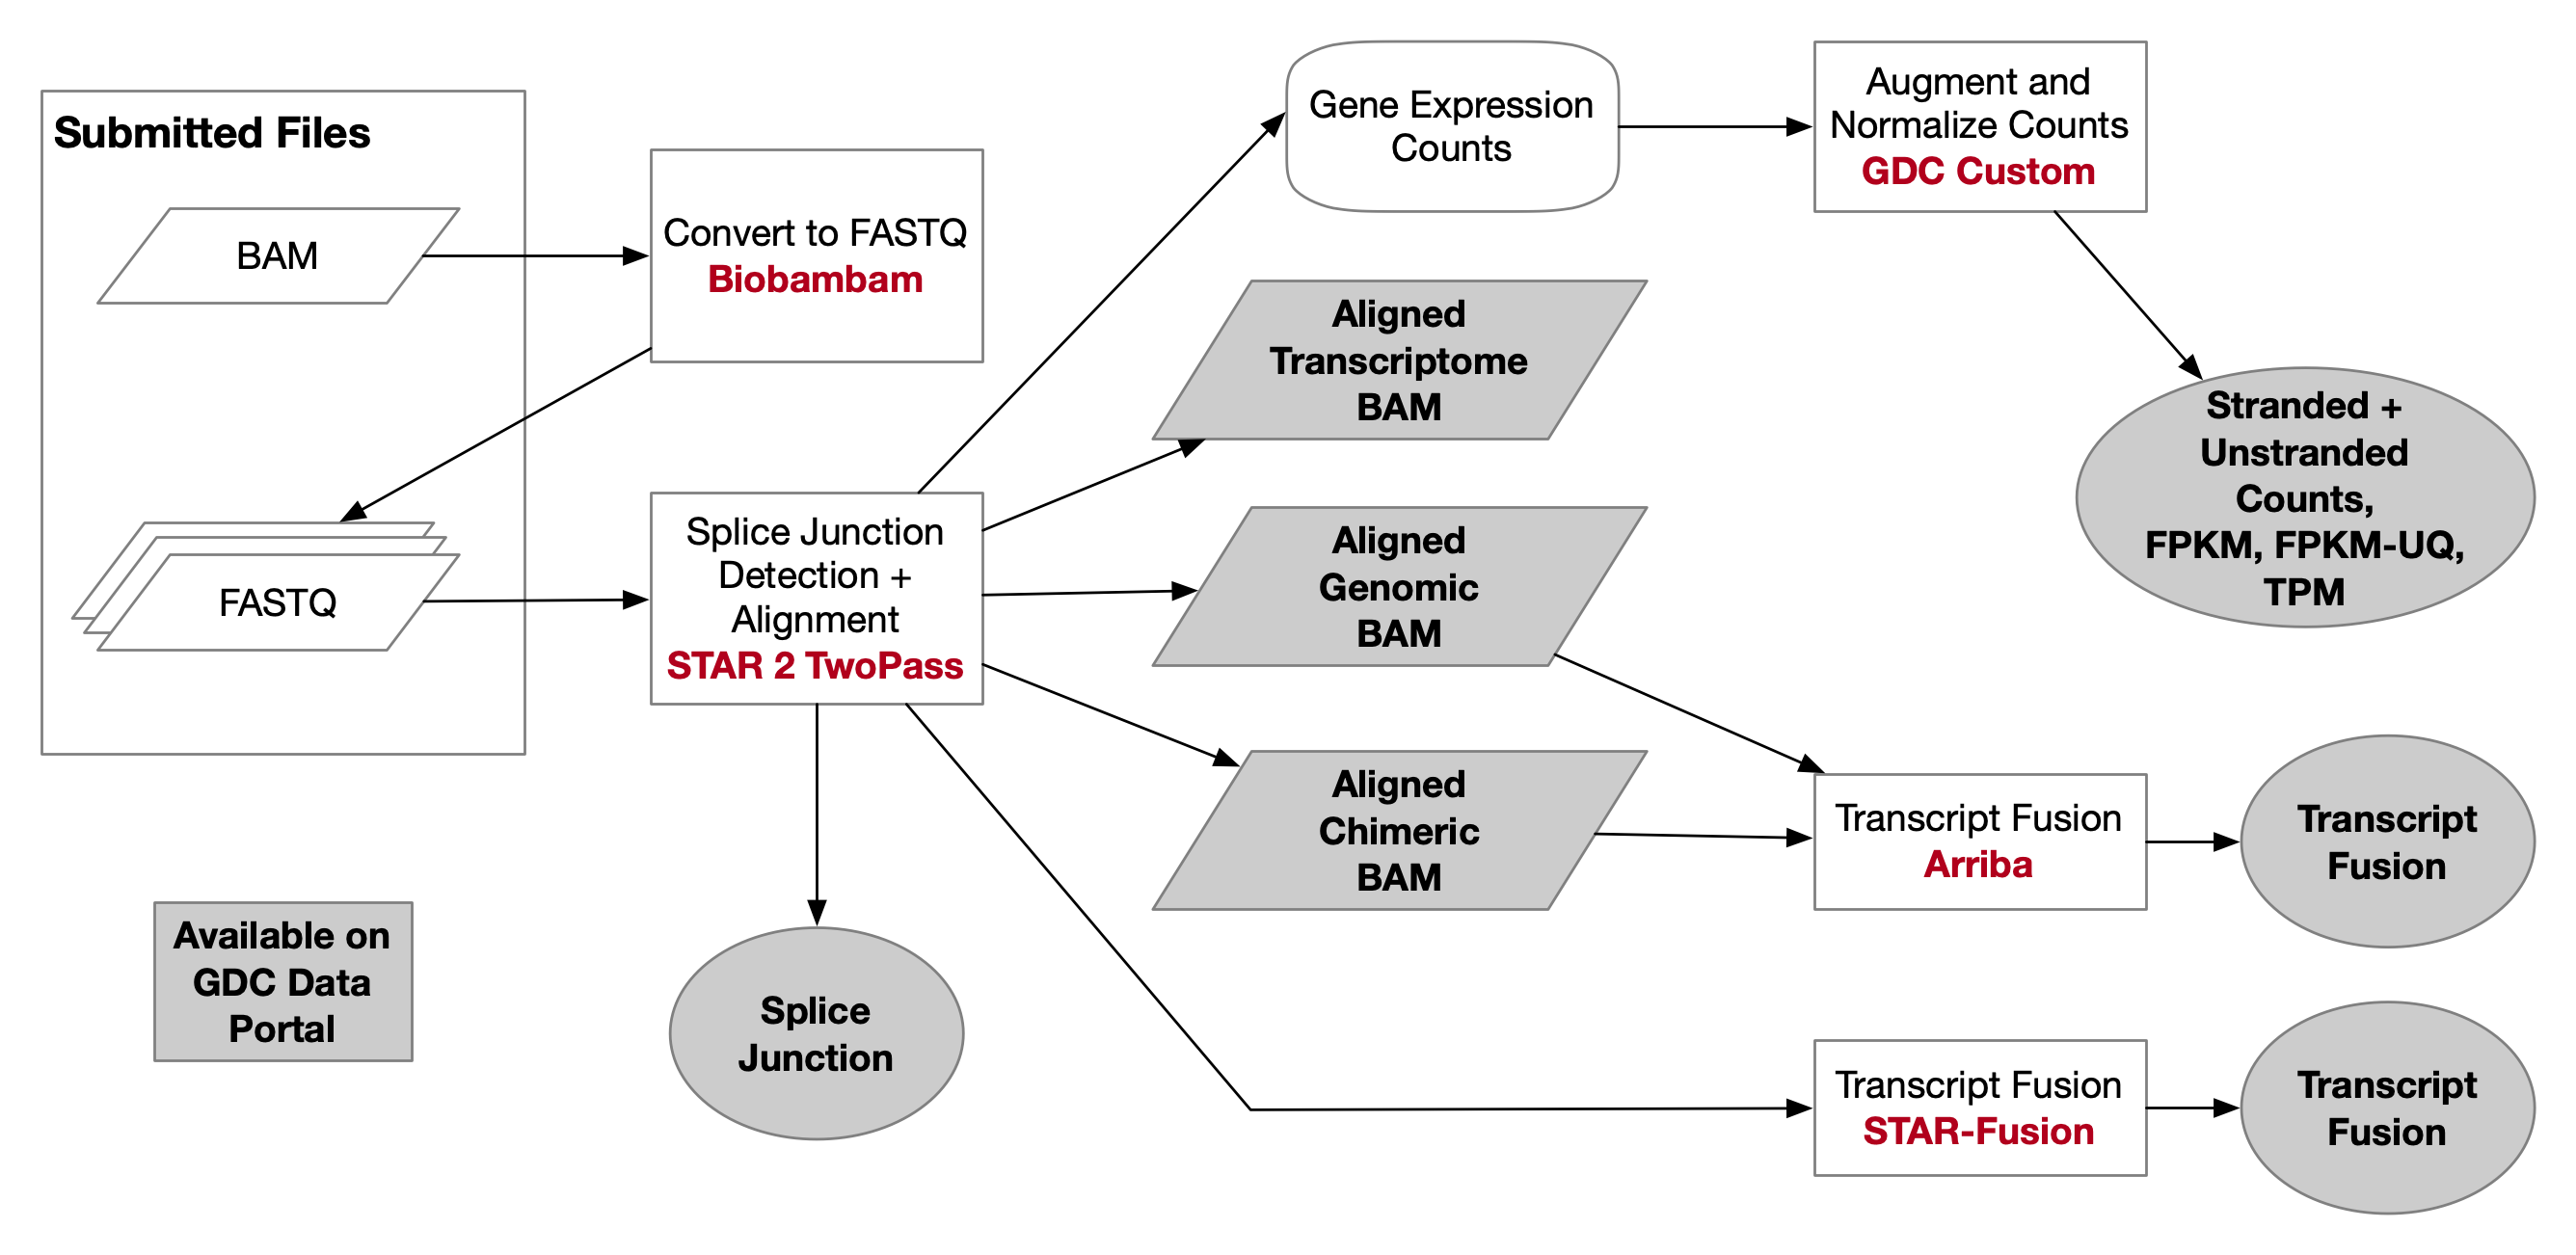
| unstranded | stranded_first |  stranded_second | tpm_unstranded | fpkm_unstranded | fpkm_uq_unstranded |

To deduce the hypoxia status, an algorithm of t-distributed Stochastic Neighbor Embedding (t-SNE) was applied [19]. t-SNE, a nonparametric, unsupervised method, can divide or condense patients into several distinct clusters, based on given signatures or hallmarks. The hallmark gene sets of hypoxia including 200 genes, were downloaded from the Molecular Signatures Database (MSigDB version 6.0). Further, expression changes of target genes involved in HIF-1 signaling pathway were analyzed between the hypoxiahigh and hypoxialow groups to explore their association with hypoxia. These targets were retrieved from the Kyoto Encyclopedia of Genes and Genomes (KEGG) database (https://www.kegg.jp/; ID:04066), including 15 genes involved in “Increase oxygen delivery” and 11 genes related to “Reduce oxygen consumption”. 
The limma algorithm was used to identify differentially expressed genes (DEGs) between the two groups [20]. Genes with a false discovery rate (FDR) adjusted p-value < 0.0001 and an absolute value of log2 (fold change) > 1 were considered as hypoxia-related DEGs.
limma algorithm
https://translational-medicine.biomedcentral.com/articles/10.1186/s12967-020-02366-0
https://academic.oup.com/bib/article/22/6/bbab173/6273240?login=true

The predefined gene sets included in our research were acquired from the Molecular Signatures Database (MSigDB; https://www.gsea-msigdb.org/gsea/msigdb/index.jsp) (44). We used the terms “lactic” and “hypoxia” as the search keywords in the MSigDB database.  After deleting duplicates, 284 LMRGs and 493 HRGs were identified for subsequent analysis [Table S2].
We analyzed differentially expressed genes (DEGs) using the R package “edgeR” in R (| log2 fold change [FC]|>1 and P < 0.05). We then identified differentially expressed LMRGs (DELMRGs) and HRGs (DEHRGs) by intersecting DEGs with LMRGs and HRGs
https://www.frontiersin.org/journals/immunology/articles/10.3389/fimmu.2022.998140/full

MSigDB
Weighted gene co-expression network analysis (WGCNA) was used to construct a scale-free co-expression network using the R package 'WGCNA' and to identify a gene module which is mostly correlated with hypoxia [38]. 
https://www.thno.org/v11p5061.htm